# Проект 3. Определение перспективного тарифа для телеком компании

### Вводная

Работая в компании сотового оператора «ВодаФон», вам как аналитику поступила задача: понять, какой тариф приносит больше денег.
Всего клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Вам предоставлены данные 500 пользователей для предварительного анализа. В таблицах содержится информация о самих пользователях, их тарифах, количестве звонков и сообщений за 2018 год. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

К тому же требуется проверить следющие продуктовые гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Цель проекта

Проанализировать поведение клиентов и сделать вывод — какой из тарифов приносит больше денег.

#### Описание тарифов
    Тариф «Смарт»
    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей
    
    Тариф «Ультра»
    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
    
    Обратите внимание: «ВодаФон» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных

Для анализа предоставлено 5 таблиц с информацией о 500 уникальных клиентов компании ВодаФон за 2018 год.

|Название таблицы | Опсиание |
|:---|:---|
|users |информация о пользователях |
|calls |информация о звонках |
|messages |информация о сообщениях |
|internet |информация об интернет-сессиях |
|tariffs |информация о тарифах |

### План выполнения проекта
    Шаг 1. Открытие файла с данными и изучение общей информации
    Шаг 2.  Подготовка данных
    - Приведение данных к нужным типам;
    - Исправление ошибок в данных.
    - Расчет для каждого пользователя:
        * количество сделанных звонков и израсходованных минут разговора по месяцам;
        * количество отправленных сообщений по месяцам;
        * объем израсходованного интернет-трафика по месяцам;
        * помесячную выручку с каждого пользователя.
    Шаг 3. Анализ данных
    Описание поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Среднее количество, дисперсия и стандартное отклонение. Построение гистограмм и описание распределения.
    Шаг 4. Проверка гипотез
        * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
        * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
    Шаг 5. Общий вывод

### 0. Установка библиотек

In [1]:
#установим возможность сохранять состояние
%pip install dill
import dill

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install seaborn>=0.11 -U

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

### 1. Открытие файла с данными и изучение общей информации

##### Таблица `users` (информация о пользователях):

In [4]:
users = pd.read_csv('/datasets/users.csv')
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Названия таблицы соответствуют документации. В слобце `churn_date` видим только 38 закрытых контрактов, осталные пропуски - открытые контракты. Столбцы `churn_date, reg_date` должны быть `datetime` формата.

##### Таблица `calls` (информация о звонках):

In [6]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


С названиями столбцов всё в порядке. `Сall_date` можно привести к формату `datetime`.  
Также обнаруживается проблема с `duration`: длительность звонка согласно документации должна быть обозначена в минутах, мы же видим тип float64 и значения после запятой.

##### Таблица `messages` (информация о сообщениях):

In [8]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Видим что `message_date` можно привести к формату `datetime`.

##### Таблица `internet` (информация об интернет-сессиях):

In [10]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Обнаруживаем лишний столбец `Unnamed`, его нужно будет обработать. Опять сталкиваемся с проблемой в точности данных: точность `mb_used`, объёма потраченного за сессию интернет-трафика, должна быть целым числом в мегабайтах, а не float64.
Столбец `session_date` можно привести к формату `datetime`. 

##### Таблица `tariffs` (информация о тарифах):

In [12]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head(3)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице с информацией о тарифах проблем не обнаружено.

### Вывод

Проанализированы 5 таблиц. Названия всех таблиц соответствуют документации.  
Для дальнейшего удобства работы с таблицами их можно объединить.

Первичный взгляд на данные позволил выявить следующие проблемы:

1. Таблица **users**:
    - В слобце `churn_date` видим только 38 закрытых контрактов, осталные пропуски - открытые контракты. Пропуски можно обработать. 
    - Столбцы `churn_date, reg_date` должны быть `datetime` формата.
<br><br>
2. Таблица **calls**: 
    - `Сall_date` можно привести к формату `datetime`.  
    - Также обнаруживается проблема с `duration`: длительность звонка согласно документации должна быть обозначена в минутах, мы же видим тип float64 и значения после запятой.
<br><br>
3. Таблица **messages**: 
    - Столбец `message_date` можно привести к формату `datetime`.
<br><br>
4. Таблица **internet**:
    - Обнаруживаем лишний столбец `Unnamed`, его нужно будет обработать. 
    - Точность `mb_used`, объёма потраченного за сессию интернет-трафика, должна быть целым числом в мегабайтах, а не float64.
    - Столбец `session_date` можно привести к формату `datetime`. 

### 2. Подготовка данных

#### 2.1. Приведение данных к нужным типам

Приведем столбцы с датой к формату datetime.

In [14]:
pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
495          NaT
496          NaT
497          NaT
498   2018-10-25
499          NaT
Name: churn_date, Length: 500, dtype: datetime64[ns]

Там где это возможно, формат заменился.

Изменим формат для всех остальных нужных столбоцов:

In [15]:
pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
pd.to_datetime(internet['session_date'], format='%Y-%m-%d').head()

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

#### 2.2. Исправление ошибок в данных

##### Удаляем столбец Unnamed

In [16]:
#выведем начало и конец таблицы
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Видим что столбец дублирует индексы. Удаляем его

In [17]:
internet.drop('Unnamed: 0', axis=1, inplace=True)
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

##### Исправляем точность

`calls`

In [18]:
calls['duration'].head()

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

Прежде чем исправлять значения убедимся в том, что мы имеем дело с минутами:

In [19]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

Text(0.5, 0, 'Продолжительность звонков')

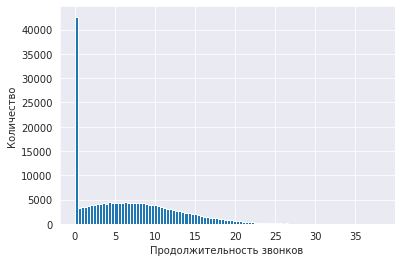

In [20]:
plot = calls['duration'].hist(bins=100)
plot.set_ylabel('Количество')
plot.set_xlabel('Продолжительность звонков')


Медианное значение 6 – шесть минут, на наш взгляд, вполне соответствует реальным значениям. 
Также, как и говорилось в задании, видим пик значений около 0.

Сначала разберемся с знаками после запятой:
Согласно документации "«ВодаФон» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута". Поэтому будем округлять все значения вверх, с точностью до целых. 

In [21]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls['duration'].head()

0     0.0
1     0.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

Значения округлились нужным нам способом.

Теперь перейдем к значениям около нуля.
Посчитаем их долю:

In [22]:
zero_part = calls[calls['duration'] == 0]['duration'].count() / calls['duration'].count()

print('Доля нулевых значений: {:.2%}'.format(zero_part))

Доля нулевых значений: 19.55%


Доля нулевых значений почти 20 процентов. Есть предположение о том, что это могут быть пропущенные звонки. Они зафиксированы в системе, однако по ним абонентскую плату не снимают. 

Для того, чтобы решить оставлять нам эти значения или нет, обратимся к конечной цели исследования – это оценка выручки различных категорий пользователей. Так как выручку мы будем считать через траты клиентов на связь, то нам следует оставлять только те действия пользоваетелей, за которые они платят. Поэтому нулевые значения мы не будем анализировать.

Приведем пример, когда бы мы их оставили: исследование активности использования тарифов клиентами (частота звонков, время в сети и т.д.). 

Удаляем нулевые значения:

Text(0.5, 0, 'Продолжительность звонков')

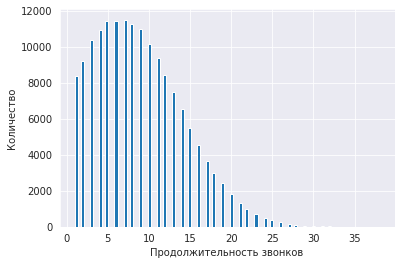

In [23]:
calls = calls.query('duration != 0')

plot = calls['duration'].hist(bins=100)
plot.set_ylabel('Количество')
plot.set_xlabel('Продолжительность звонков')

`mb_used`

In [24]:
internet['mb_used'].head()

0     112.95
1    1052.81
2    1197.26
3     550.27
4     302.56
Name: mb_used, dtype: float64

Text(0.5, 0, 'Мегабайты')

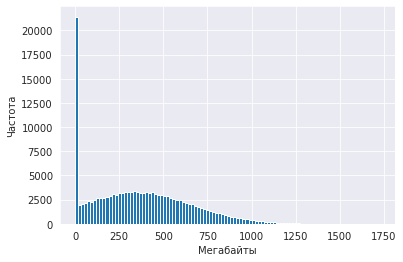

In [25]:
plot = internet['mb_used'].hist(bins=100)
plot.set_ylabel('Частота')
plot.set_xlabel('Мегабайты')

Видим большое количество значений около нуля и второй пик около 320 мб. 320 мб за сессию вполне реальное значение.
Округляем значения до мегабайтов:

In [26]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'].head()

0     113.0
1    1053.0
2    1198.0
3     551.0
4     303.0
Name: mb_used, dtype: float64

In [27]:
#оценим долю 0:
zero_part_i = internet[internet['mb_used'] == 0]['mb_used'].count() / internet['mb_used'].count()

print('Доля нулевых значений: {:.2%}'.format(zero_part_i))

Доля нулевых значений: 13.12%


Доля нулевых значений немного меньше чем со звонками, однко все ещё довольно большая - 13%. Нулевые значения скорее всего опять возникают во время "неудачных" сессий – например, человек пытался выйти в интернет, но подключиться не удалось. Информация сохранилась у оператора, но трафик не использован и плата не взялась.

Очистим данные от нулевых значений:

Text(0.5, 0, 'Мегабайты')

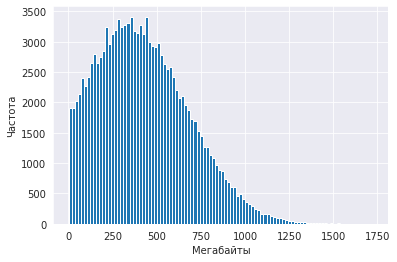

In [28]:
internet = internet.query('mb_used != 0')

plot = internet['mb_used'].hist(bins=100)
plot.set_ylabel('Частота')
plot.set_xlabel('Мегабайты')

#### 2.3. Добавление пользовательских данных

##### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [29]:
calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


In [30]:
#добавим в таблицу столбец с месяцами
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Так как у нас данные ровно за 1 год, каждый месяц будет уникальным.

In [31]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_pivot.head()

count      sum
              duration duration
user_id month                  
1000    5           17    159.0
        6           28    172.0
        7           41    340.0
        8           42    408.0
        9           46    466.0

Обратим внимание на то, что если бы мы оставили "нулевые" звонки, данные бы изменились и были бы посчитаны по другому.

In [32]:
#переименуем столбцы
calls_pivot.columns = ['calls_count', 'calls_sum']

##### Количество отправленных сообщений по месяцам

In [33]:
#добавляем столбец с месяцами
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#собираем таблицу
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

messages_pivot.columns = ['messages_count']

messages_pivot.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

##### Объем израсходованного интернет-трафика по месяцам

In [34]:
#добавляем столбец с месяцами
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

#собираем таблицу
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

internet_pivot.columns = ['internet_traffic']

internet_pivot.head()

internet_traffic
user_id month                  
1000    5                2256.0
        6               23257.0
        7               14016.0
        8               14070.0
        9               14581.0

##### Помесячная выручка с каждого пользователя

In [35]:
#соберем все данные в одну таблицу
month_id_pivot = calls_pivot.join([messages_pivot, internet_pivot], how='outer')
month_id_pivot.reset_index(inplace=True)
month_id_pivot.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic
0,1000,5,17.0,159.0,22.0,2256.0
1,1000,6,28.0,172.0,60.0,23257.0
2,1000,7,41.0,340.0,75.0,14016.0
3,1000,8,42.0,408.0,81.0,14070.0
4,1000,9,46.0,466.0,57.0,14581.0


In [36]:
#создадим словарь "пользователь: тариф"
users_tariff_dict = dict(zip(users.user_id, users.tariff))

In [37]:
#добавим тарифы
def add_tariff(user_id):
    return users_tariff_dict[user_id]

month_id_pivot['tariff'] = month_id_pivot['user_id'].apply(add_tariff)

month_id_pivot.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic,tariff
0,1000,5,17.0,159.0,22.0,2256.0,ultra
1,1000,6,28.0,172.0,60.0,23257.0,ultra
2,1000,7,41.0,340.0,75.0,14016.0,ultra
3,1000,8,42.0,408.0,81.0,14070.0,ultra
4,1000,9,46.0,466.0,57.0,14581.0,ultra
5,1000,10,44.0,350.0,73.0,14717.0,ultra
6,1000,11,37.0,338.0,58.0,14768.0,ultra
7,1000,12,38.0,333.0,70.0,9827.0,ultra
8,1001,11,45.0,430.0,NaN,18452.0,smart
9,1001,12,47.0,414.0,NaN,14053.0,smart


In [38]:
month_id_pivot.isna().sum()

user_id               0
month                 0
calls_count          46
calls_sum            46
messages_count      497
internet_traffic     13
tariff                0
dtype: int64

Возникшие пропуски будем заполнять нулями, поскольку клиент не пользовался данной функцией.

In [39]:
month_id_pivot.fillna(0, inplace=True)
month_id_pivot.isna().sum()

user_id             0
month               0
calls_count         0
calls_sum           0
messages_count      0
internet_traffic    0
tariff              0
dtype: int64

Для того, чтобы посчитать помесячную выручку с каждого пользователя: 
1. Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 

In [40]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Все отрицательные значения будут означать то, что пользователь уложился в предоставленный трафик. Будем заменять эти значения на ноль:

In [41]:
#подсчет для положительного результата
def calculate_if_positive(value, deduction):
    if (value - deduction) < 0:
        return 0
    return value - deduction

#функция подсчитывающая траты сверх лимита
def calc_off_limits(row):
    if row['tariff'] == 'smart':
        row['calls_sum'] = calculate_if_positive(row['calls_sum'], 500)
        row['messages_count'] = calculate_if_positive(row['messages_count'], 50)
        row['internet_traffic'] = calculate_if_positive(row['internet_traffic'], 15360)
        return row
    
    if row['tariff'] == 'ultra':
        row['calls_sum'] = calculate_if_positive(row['calls_sum'], 3000)
        row['messages_count'] = calculate_if_positive(row['messages_count'], 1000)
        row['internet_traffic'] = calculate_if_positive(row['internet_traffic'], 30720)
        return row
    
month_id_pivot_off_limits = month_id_pivot.apply(calc_off_limits, axis=1) 
month_id_pivot_off_limits.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic,tariff
0,1000,5,17.0,0.0,0.0,0.0,ultra
1,1000,6,28.0,0.0,0.0,0.0,ultra
2,1000,7,41.0,0.0,0.0,0.0,ultra
3,1000,8,42.0,0.0,0.0,0.0,ultra
4,1000,9,46.0,0.0,0.0,0.0,ultra
5,1000,10,44.0,0.0,0.0,0.0,ultra
6,1000,11,37.0,0.0,0.0,0.0,ultra
7,1000,12,38.0,0.0,0.0,0.0,ultra
8,1001,11,45.0,0.0,0.0,3092.0,smart
9,1001,12,47.0,0.0,0.0,0.0,smart


2. Остаток умножим на значение из тарифного плана

In [42]:
def calc_gbytes(mbyte):
    return np.ceil(mbyte / 1024) #здесь тоже округляем значение вверх, 
                                 #так как пользователь будет платить за целый гигабайт

def offlimits_to_rub(row):
    if row['tariff'] == 'smart':
        row['calls_sum'] *= 3
        row['messages_count'] *= 3
        row['internet_traffic'] = calc_gbytes(row['internet_traffic']) * 200
        return row
    
    if row['tariff'] == 'ultra':
        row['calls_sum'] *= 1
        row['messages_count'] *= 1
        row['internet_traffic'] = calc_gbytes(row['internet_traffic']) * 150
        return row

off_limits_rub = month_id_pivot_off_limits.apply(offlimits_to_rub, axis=1)
off_limits_rub.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic,tariff
0,1000,5,17.0,0.0,0.0,0.0,ultra
1,1000,6,28.0,0.0,0.0,0.0,ultra
2,1000,7,41.0,0.0,0.0,0.0,ultra
3,1000,8,42.0,0.0,0.0,0.0,ultra
4,1000,9,46.0,0.0,0.0,0.0,ultra
5,1000,10,44.0,0.0,0.0,0.0,ultra
6,1000,11,37.0,0.0,0.0,0.0,ultra
7,1000,12,38.0,0.0,0.0,0.0,ultra
8,1001,11,45.0,0.0,0.0,800.0,smart
9,1001,12,47.0,0.0,0.0,0.0,smart


3. Прибавим абонентскую плату, соответствующую тарифному плану.

In [43]:
#добавим абонентскую плату в таблицу
off_limits_rub['monthly_fee'] = off_limits_rub['tariff'].apply(lambda x: 550 if x=='smart' else 1950)

#для проверки отобразим несколько случайных строк
off_limits_rub.sample(7)

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic,tariff,monthly_fee
947,1149,10,30.0,0.0,81.0,1200.0,smart,550
837,1131,12,30.0,0.0,0.0,1200.0,smart,550
968,1152,11,48.0,0.0,0.0,0.0,ultra,1950
2266,1359,7,11.0,0.0,0.0,0.0,smart,550
74,1010,9,18.0,0.0,0.0,200.0,smart,550
2936,1457,10,58.0,45.0,0.0,800.0,smart,550
436,1067,12,43.0,0.0,84.0,0.0,smart,550


In [44]:
off_limits_rub['monthly_total'] = (off_limits_rub['calls_sum'] + 
                                   off_limits_rub['messages_count'] +
                                   off_limits_rub['internet_traffic'] +
                                   off_limits_rub['monthly_fee'])

#соберем финальную таблицу
monthly_payments = off_limits_rub.loc[:, ['user_id', 'month', 'tariff', 'monthly_total']]
monthly_payments.head(10)

,user_id,month,tariff,monthly_total
0,1000,5,ultra,1950.0
1,1000,6,ultra,1950.0
2,1000,7,ultra,1950.0
3,1000,8,ultra,1950.0
4,1000,9,ultra,1950.0
5,1000,10,ultra,1950.0
6,1000,11,ultra,1950.0
7,1000,12,ultra,1950.0
8,1001,11,smart,1350.0
9,1001,12,smart,550.0


### Вывод

На данном шаге мы подготовили данные для дальнейшего анализа.

1. Столбцы с датой были приведены к формату datetime.
<br><br>
2. Исправлены ошибки в данных:
    - Был удален столбец таблицы `internet`, который дублировал индексы.
    - Значения минут и интернет трафика округлены согласно тарифной логике оператора.
    - Были отфильтрованы нулевые значения, поскольку их наличие не соответствовало конечной цели исследования. 
<br><br>
3. Рассчитано для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячная выручка с каждого пользователя 

### 3. Анализ данных

**Задача:** Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [45]:
month_id_pivot.head(3)

,user_id,month,calls_count,calls_sum,messages_count,internet_traffic,tariff
0,1000,5,17.0,159.0,22.0,2256.0,ultra
1,1000,6,28.0,172.0,60.0,23257.0,ultra
2,1000,7,41.0,340.0,75.0,14016.0,ultra


In [46]:
smart_users = month_id_pivot.query('tariff == "smart"')
ultra_users = month_id_pivot.query('tariff == "ultra"')

In [47]:
#установим отображение 1 знака после запятой
pd.set_option('precision', 1)

smart_users['calls_sum'].describe()

count    2229.0
mean      417.9
std       190.3
min         0.0
25%       282.0
50%       422.0
75%       545.0
max      1435.0
Name: calls_sum, dtype: float64

In [48]:
ultra_users['calls_sum'].describe()

count     985.0
mean      526.6
std       317.6
min         0.0
25%       284.0
50%       518.0
75%       752.0
max      1673.0
Name: calls_sum, dtype: float64

Обратим внимание на то, что выборки не равны. Более подробно рассмотрим значения далее:

##### Время разговора

Добавим рассчет дисперсии для выборки:

In [49]:
#подсчет дисперсии для выборки
def variance(sample):
    return np.var(sample, ddof=1)

#напишем функцию с интересующими нас статистиками
def stats_for_sample(sample):
    print('Среднее: {:.1f}'.format(sample.mean()))
    print('Медиана: {:.1f}'.format(sample.median()))
    print('Дисперсия: {:.1f}'.format(variance(sample)))
    print('Ст. отклонение: {:.1f}'.format(variance(sample) ** .5))

In [50]:
stats_for_sample(smart_users['calls_sum'])

Среднее: 417.9
Медиана: 422.0
Дисперсия: 36219.3
Ст. отклонение: 190.3


In [51]:
stats_for_sample(ultra_users['calls_sum'])

Среднее: 526.6
Медиана: 518.0
Дисперсия: 100873.6
Ст. отклонение: 317.6


Для пользователей тарифа smart среднее время звонков 417.9 и медиана 422 минуты, что меньше чем у пользователей тарифа ultra (среднее 526.6 мин., медиана 518 мин.)
<br>
Также видим, что значения сильнее разбросаны у пользователей тарифа ultra (дисперсия 100873.6), чем у пользователей smart (дисперсия 36219.3).

Поскольку выборки не равны по размеру, будем использовать нормализацию при построении гистограмм. Мы имеем дело с непрырывной переменной (время), поэтому будем анализировать полученные распределения на гистограмме плотности. Параметр `stat="density"` (англ. Плотность) из билиботеки Seaborn позволит отобразить нормализованные данные на гистограмме плотности.

Text(0.5, 0.98, 'Время разговора и тариф пользователя      ')

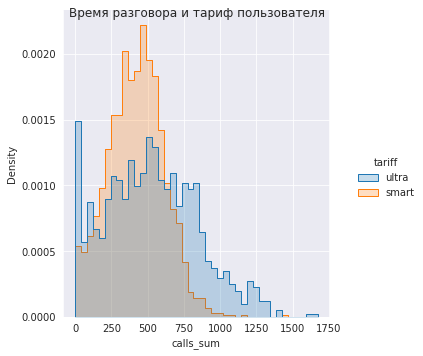

In [52]:
g = sns.displot(month_id_pivot, x="calls_sum", 
            hue="tariff", stat="density",
            element="step", common_norm=False,
            )
g.fig.suptitle('Время разговора и тариф пользователя      ')

Описание распределений:

На графиках видно, что распределение времени разговора для пользователей тарифа smart близко к нормальному, однако скошено влево. 

У пользователей тарифа ultra видим больший разброс значений, график более плоский. Видим пик возле нуля.
Проходя пик значений возле нуля, можем сказать что распределение также будет стремиться к нормальному.

Хотя мы удаляли звонки с продолжительностью 0 минут, эти значения все равно появляются потому что при объединении таблиц в одну у нас появлялись пропуски и мы заполняли их нулевыми значениями.

Рассмотрим область возле нуля подробнее, исключив нулевые значения:

Text(0.5, 0.98, 'Время разговора и тариф пользователя     ')

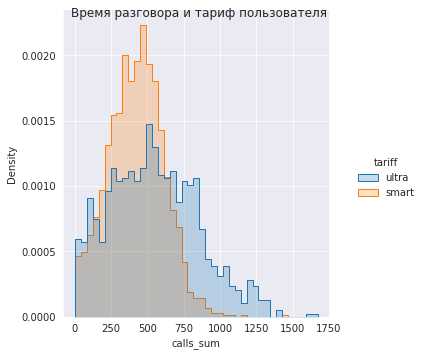

In [53]:
g = sns.displot(month_id_pivot.query('calls_sum != 0'), 
            x="calls_sum", 
            hue="tariff", 
            stat="density", 
            element="step", 
            common_norm=False)

g.fig.suptitle('Время разговора и тариф пользователя     ')

Пик исчез и распределение стало больше походить на нормальное.  
Почему некоторые пользователи не звонили целый месяц, но платили за пакет услуг? Возможно это могут быть клиенты, пользующиеся преимущественно звонками через интернет (WhatsApp, Viber и т.д.) или же клиенты, которые уезжали на этот месяц за границу.

##### Количество сообщений

In [54]:
stats_for_sample(smart_users['messages_count'])

Среднее: 33.4
Медиана: 28.0
Дисперсия: 796.8
Ст. отклонение: 28.2


In [55]:
stats_for_sample(ultra_users['messages_count'])

Среднее: 49.4
Медиана: 38.0
Дисперсия: 2285.3
Ст. отклонение: 47.8


Согласно полученной статистике, пользователи тарифа ultra имеют большее среднее и медиану, однако и дисперсия у них больше. 

Хотя `messages_count` дискретная переменная, для построения гистограмм все равно оставим параметр density, поскольку он нормализует выборки.

Text(0.5, 0.98, 'Кол-во сообщений и тариф пользователя')

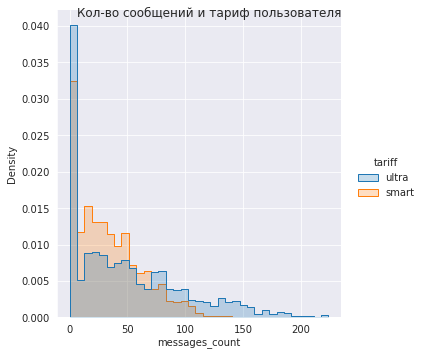

In [56]:
g = sns.displot(month_id_pivot, 
            x="messages_count", hue="tariff", 
            stat="density", element="step", common_norm=False)


g.fig.suptitle('Кол-во сообщений и тариф пользователя')

В таблице с сообщениями мы не удаляли нулевые значения и у нас вознило 497 нулевых значений при объединении таблиц. 
Соответсвенно видим пик возле нуля для обоих графиков. Оба графика можно ххарактеризовать распределением Пуассона.
Заметим что у пользователей тарифа ultra более долгий хвост справа.

##### Интернет трафик

In [57]:
stats_for_sample(smart_users['internet_traffic'])

Среднее: 16229.2
Медиана: 16531.0
Дисперсия: 34545911.1
Ст. отклонение: 5877.6


In [58]:
stats_for_sample(ultra_users['internet_traffic'])

Среднее: 19486.9
Медиана: 19324.0
Дисперсия: 101935621.0
Ст. отклонение: 10096.3


Согласно полученной статистике, пользователи тарифа ultra имеют большее среднее и медиану, однако и дисперсия у них больше. 

Text(0.5, 0.98, 'Интернет-трафик и тариф пользователя')

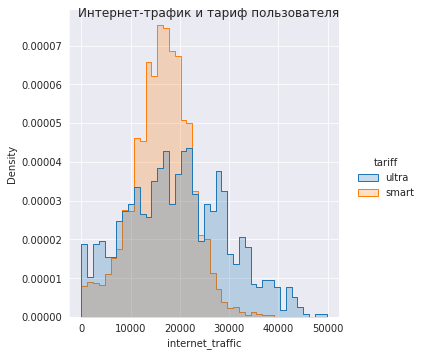

In [59]:
g = sns.displot(month_id_pivot, x="internet_traffic", hue="tariff", stat="density", element="step", common_norm=False)

g.fig.suptitle('Интернет-трафик и тариф пользователя')

Оба распределения интернет трафика у пользователей различных тарифов близко к нормальному, однако немного скошено влево.

У пользователей тарифа ultra видим больший разброс значений, график более плоский. 

### Вывод

На даннам этапе проводился анализ данных.
Описывалось поведение клиентов оператора, исходя из выборки. Было проанализировано сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. После мы построили гистограммы и описали полученные распределения.

**Время разговора**

Для пользователей тарифа ультра среднее время звонков 417.9 и медиана 422 минуты, что меньше чем у пользователей тарифа ультра (среднее 526.6 мин., медиана 518 мин.)
Также видим, что значения сильнее разбросаны у пользователей тарифа ультра (дисперсия 100873.6), чем у пользователей смарт (дисперсия 36219.3).

Описение распределений:

Распределение времени разговора для пользователей тарифа smart близко к нормальному, однако скошено влево.
У пользователей тарифа ultra видим больший разброс значений, график более плоский. Видим пик возле нуля. 

Хотя мы удаляли звонки с продолжительностью 0 минут, эти значения все равно появляются поскольку при объединении таблиц в одну у нас появлялись пропуски и мы заполняли их нулевыми значениями. При исключении нулевых значений пик исчезает и распределение становится похоже на нормальное.

Почему некоторые пользователи не звонили целый месяц, но платили за пакет услуг? Возможно это могут быть клиенты, пользующиеся преимущественно звонками через интернет (WhatsApp, Viber и т.д.) или же клиенты, которые уезжали на этот месяц за границу.

**Количество сообщений**  


Статистика | smart_users | ultra_users
:---|---|---
Среднее: | 33.4 | 49.4
Медиана: | 28.0 | 38.0
Дисперсия: | 796.8 | 2285.3
Ст. отклонение: | 28.2| 47.8

Согласно полученной статистике, пользователи тарифа ультра имеют большее среднее и медиану, однако и дисперсия у них больше. 

Наблюдается пик возле нуля для обоих графиков. Оба графика можно характеризовать распределением Пуассона. Заметим что у пользователей тарифа ultra более долгий хвост справа.

**Интернет трафик**  

Статистика | smart_users | ultra_users
:---|---|---
Среднее: | 16229.2 | 19486.9
Медиана: | 16531.0 | 19324.0
Дисперсия: | 34545911.1 |  101935621.0
Ст. отклонение: | 5877.6 | 10096.3


Согласно полученной статистике, пользователи тарифа ultra имеют большее среднее и медиану, однако и дисперсия у них больше.

Оба распределения интернет трафика у пользователей различных тарифов близко к нормальному, однако немного скошено влево.
У пользователей тарифа ультра видим больший разброс значений, график более плоский.

### 4. Проверка гипотез

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

##### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сначала разберем понятие средней выручки:

ARPU =  (англ. Average revenue per user, средняя выручка на одного пользователя) — показатель, используемый телекоммуникационными компаниями и означающий средний доход (обычно за месяц) в расчёте на одного абонента.

Цена средней выручки за период в расчёте за одного пользователя рассчитывается по следующей формуле:

$$ARPU = Доход  / N пользователей$$

Сформируем нулевую \\(H_0\\) и альтернативную гипотезу \\(H_1\\):

\\(H_0\\): Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.

\\(H_1\\): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Таким образом при сравнении средних значений двух генеральных совокупностей (месячных выручек пользователей тарифов «Ультра» и «Смарт») мы сможем отвергнуть или не отвергнуть нулевую гипотезу.

##### Выбор метода 
Проверим распределение признаков в каждой выборке.

In [60]:
monthly_payments.head(3)

,user_id,month,tariff,monthly_total
0,1000,5,ultra,1950.0
1,1000,6,ultra,1950.0
2,1000,7,ultra,1950.0


Text(0.5, 0.98, 'Выручка и тариф пользователя')

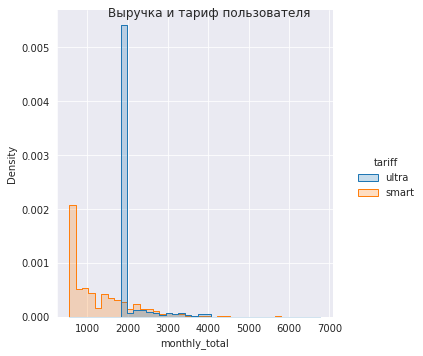

In [61]:
g = sns.displot(monthly_payments, x="monthly_total", hue="tariff", stat="density", element="step", common_norm=False)

g.fig.suptitle('Выручка и тариф пользователя')

Оба графика схожи с распределением Пуассона. Оно при достаточно больших средних стремится к нормальному, поэтому мы можем использовать Т-критерией Стьюдента.

Посчитаем среднее и дисперсию

In [62]:
stats_for_sample(monthly_payments.query('tariff == "ultra"')['monthly_total'])

Среднее: 2071.1
Медиана: 1950.0
Дисперсия: 143491.2
Ст. отклонение: 378.8


In [63]:
stats_for_sample(monthly_payments.query('tariff == "smart"')['monthly_total'])

Среднее: 1294.6
Медиана: 1038.0
Дисперсия: 673931.3
Ст. отклонение: 820.9


##### Применение Т-критерия Стьюдента

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем применять метод `scipy.stats.ttest_ind(array1, array2, equal_var)`.

equal_var — параметр, задающий считать ли равными дисперсии выборок, установим как False, поскольку дисперсии не равны.

In [64]:
sample_1 = monthly_payments.query('tariff == "ultra"')['monthly_total']
sample_2 = monthly_payments.query('tariff == "smart"')['monthly_total']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.7240946993530856e-246
Отвергаем нулевую гипотезу


Согласно т-тесту отвергаем нулевую гипотезу.  
Р-значение очень мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.  
Таким образом принимаем
𝐻1 : Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.  
Средняя выручка пользователей тарифов «Ультра» больше, поскольку у них среднее 2071.1, а у пользователей «Смарт» среднее 1294.6 рублей.

##### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформируем нулевую \\(H_0\\) и альтернативную гипотезу \\(H_1\\):

\\(H_0\\): Средние выручки пользователей из Москвы и пользователей из других регионов равны.

\\(H_1\\): Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Добавим информацию о городе в таблицу с доходом:

In [65]:
id_city_dict = dict(zip(users.user_id, users.city))

monthly_payments['city'] = monthly_payments['user_id'].apply(lambda x: id_city_dict[x])
monthly_payments.head()

,user_id,month,tariff,monthly_total,city
0,1000,5,ultra,1950.0,Краснодар
1,1000,6,ultra,1950.0,Краснодар
2,1000,7,ultra,1950.0,Краснодар
3,1000,8,ultra,1950.0,Краснодар
4,1000,9,ultra,1950.0,Краснодар


In [66]:
#найдем Москву 
monthly_payments['moscow'] = monthly_payments['city'].apply(lambda x: 1 if x == "Москва" else 0)
monthly_payments.head()

,user_id,month,tariff,monthly_total,city,moscow
0,1000,5,ultra,1950.0,Краснодар,0
1,1000,6,ultra,1950.0,Краснодар,0
2,1000,7,ultra,1950.0,Краснодар,0
3,1000,8,ultra,1950.0,Краснодар,0
4,1000,9,ultra,1950.0,Краснодар,0


Text(0.5, 0.98, 'Выручка и местоположение пользователей')

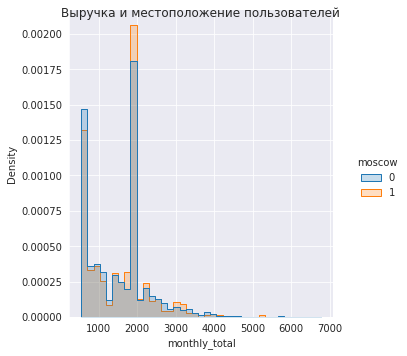

In [67]:
#проверим распределение
g = sns.displot(monthly_payments, x="monthly_total", hue="moscow", stat="density", element="step", common_norm=False)
g.fig.suptitle('Выручка и местоположение пользователей')

Видим что оба графика из предыдущего пункта "слились" вместе.

Впринципе уже графически видно что выброки практически одинаковы, однако можем запустить Т-критерией Стьюдента для проверки.

Распределение здесь не параметрическое, поэтому также добавим непараметрический U-критерий Манна-Уитни о равенстве выборочных распределений.

In [68]:
stats_for_sample(monthly_payments.query('moscow == 0')['monthly_total'])

Среднее: 1528.3
Медиана: 1587.0
Дисперсия: 656766.6
Ст. отклонение: 810.4


In [69]:
stats_for_sample(monthly_payments.query('moscow != 0')['monthly_total'])

Среднее: 1550.8
Медиана: 1750.0
Дисперсия: 566183.0
Ст. отклонение: 752.5


Отметим что средние практически равны между собой, дисперсии же немного отличаются.

In [70]:
#запускаем т-тест
sample_1 = monthly_payments.query('moscow == 0')['monthly_total']
sample_2 = monthly_payments.query('moscow != 0')['monthly_total']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


In [71]:
#запускаем U-тест
sample_1 = monthly_payments.query('moscow == 0')['monthly_total']
sample_2 = monthly_payments.query('moscow != 0')['monthly_total']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(
    sample_1, 
    sample_2, 
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Распределения различны")
else:
    print("Распределения одинаковы") 

p-значение: 0.19208767770645735
Распределения одинаковы


Согласно т-тесту не получилось отвергнуть нулевую гипотезу.  
U-тест подтверждает что распределения одинаковы.

Таким образом остается принятой гипотеза:
\\(H_0\\): Средние выручки пользователей из Москвы и пользователей из других регионов равны. 


### Вывод

На данном шаге мы проверяли следующие продуктовые гипотезы:

**1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается**  

После того как мы разобрали понятие средней выручки, сформировали нулевую и альтернативную гипотезы:
<br>\\(H_0\\): Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.
<br>\\(H_1\\): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.


После проверки распределения признаков в каждой выборке мы выявили, что оба распределения схожи с распределением Пуассона. 
На основании этого был выбран метод для сравнения средних двух генеральных совокупностей по отдельно взятым выборкам – Т-критерией Стьюдента.

После применения Т-критерия Стьюдента мы получили \\(p =  2.73e-246\\)  
Р-значение крайне мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.
Таким образом была принята гипотеза \\(H_1\\): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.  

Средняя выручка пользователей тарифов «Ультра» больше, поскольку у них среднее 2071.1, а у пользователей тарифа «Смарт» среднее 1294.6 рублей.

**2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**  

На данном этапе мы сформировали следующие статистические гипотезы:
<br>\\(H_0\\): Средние выручки пользователей из Москвы и пользователей из других регионов равны.
<br>\\(H_1\\): Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

После небольшой обработки данных мы проверили распределение – оно было непараметрическим, поэтому мы добавим непараметрический U-критерий Манна-Уитни о равенстве выборочных распределений для проверки нашей гипотезы.

Средние выборок были практически равны между собой, дисперсии же немного отличались.

Т-тест показал, что не получилось отвергнуть нулевую гипотезу (p-значение: 0.51)

U-тест показал, что распределения одинаковы. (p-значение: 0.19)

Таким образом у нас остается принятой гипотеза: 𝐻0: Средние выручки пользователей из Москвы и пользователей из других регионов равны.

### 5. Общий вывод

**1.**  Мы обработали и проанализировали информацию о выборке из 500 клиентов из пяти различных таблиц. В процессе работы были решены следующие проблемы:

**2.1.** Столбцы с датами были приведены к формату datetime.
<br><br>
**2.2.** Исправлены ошибки в данных:

- Был удален столбец таблицы `internet`, который дублировал индексы.
- Значения минут и интернет трафика округлены согласно тарифной логике оператора.
- Были отфильтрованы нулевые значения, поскольку их наличие не соответствовало конечной цели исследования. 
<br>

**2.3.** Рассчитано для каждого пользователя:
<br>
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя 
        

**3.** Проведен исследовательский анализ данных.
Мы описали поведение клиентов оператора, исходя из выборки. Было проанализировано сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. После мы построили гистограммы и описали полученные распределения.

**Время разговора**  
Было получено, что для пользователей тарифа ультра среднее время звонков 417.9 и медиана 422 минуты, что меньше чем у пользователей тарифа ультра (среднее 526.6 мин., медиана 518 мин.)
Значения сильнее разбросаны у пользователей тарифа ультра (дисперсия 100873.6), чем у пользователей смарт (дисперсия 36219.3).

Описение распределений:

Распределение времени разговора для пользователей тарифа smart близко к нормальному, однако скошено влево.
У пользователей тарифа ultra видим больший разброс значений, график более плоский. Наблюдается пик возле нуля. 

Хотя мы удаляли звонки с продолжительностью 0 минут, эти значения все равно появляются поскольку при объединении таблиц в одну у нас появлялись пропуски и мы заполняли их нулевыми значениями. При исключении нулевых значений пик исчезает и распределение становится похоже на нормальное.

Почему некоторые пользователи не звонили целый месяц, но платили за пакет услуг? Возможно это могут быть клиенты, пользующиеся преимущественно звонками через интернет (WhatsApp, Viber и т.д.) или же клиенты, которые уезжали на этот месяц за границу.

**Количество сообщений**  

Статистика | smart_users | ultra_users
:---|---|---
Среднее: | 33.4 | 49.4
Медиана: | 28.0 | 38.0
Дисперсия: | 796.8 | 2285.3
Ст. отклонение: | 28.2| 47.8

Согласно полученной статистике, пользователи тарифа ультра имеют большее среднее и медиану, однако и дисперсия у них больше. 

Наблюдается пик возле нуля для обоих распределений. Оба распределения можно характеризовать распределением Пуассона. Было зафиксировано, что у пользователей тарифа ultra более долгий хвост справа.

**Интернет трафик**  

Статистика | smart_users | ultra_users
:---|---|---
Среднее: | 16229.2 | 19486.9
Медиана: | 16531.0 | 19324.0
Дисперсия: | 34545911.1 |  101935621.0
Ст. отклонение: | 5877.6 | 10096.3


Согласно полученной статистике, пользователи тарифа ultra имеют большее среднее и медиану, однако и дисперсия у них больше.

Оба распределения интернет трафика у пользователей различных тарифов близко к нормальному, однако немного скошено влево.
У пользователей тарифа ультра наблюдается больший разброс значений, распределение более плоское.


**4.** На данном шаге мы проверяли следующие продуктовые гипотезы:

**4.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается**  

После того как мы разобрали понятие средней выручки, сформировали нулевую и альтернативную гипотезы:
<br>\\(H_0\\): Средние выручки пользователей тарифов «Ультра» и «Смарт» равны.
<br>\\(H_1\\): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.


После проверки распределения признаков в каждой выборке мы выявили, что оба распределения схожи с распределением Пуассона. 
На основании этого был выбран метод для сравнения средних двух генеральных совокупностей по отдельно взятым выборкам – Т-критерией Стьюдента.

После применения Т-критерия Стьюдента мы получили \\(p =  2.73e-246\\)  
Р-значение крайне мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.
Таким образом была принята гипотеза \\(H_1\\): Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.  

Средняя выручка пользователей тарифов «Ультра» больше, поскольку у них среднее 2071.1, а у пользователей тарифа «Смарт» среднее 1294.6 рублей.

**4.2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**  

На данном этапе мы сформировали следующие статистические гипотезы:
<br>\\(H_0\\): Средние выручки пользователей из Москвы и пользователей из других регионов равны.
<br>\\(H_1\\): Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

После небольшой обработки данных мы проверили распределение – оно было непараметрическим, поэтому мы добавим непараметрический U-критерий Манна-Уитни о равенстве выборочных распределений для проверки нашей гипотезы.

Средние выборок были практически равны между собой, дисперсии же немного отличались.

Т-тест показал, что не получилось отвергнуть нулевую гипотезу (p-значение: 0.51)

U-тест показал, что распределения одинаковы. (p-значение: 0.19)

Таким образом у нас осталась принятой гипотеза: 𝐻0: Средние выручки пользователей из Москвы и пользователей из других регионов равны.